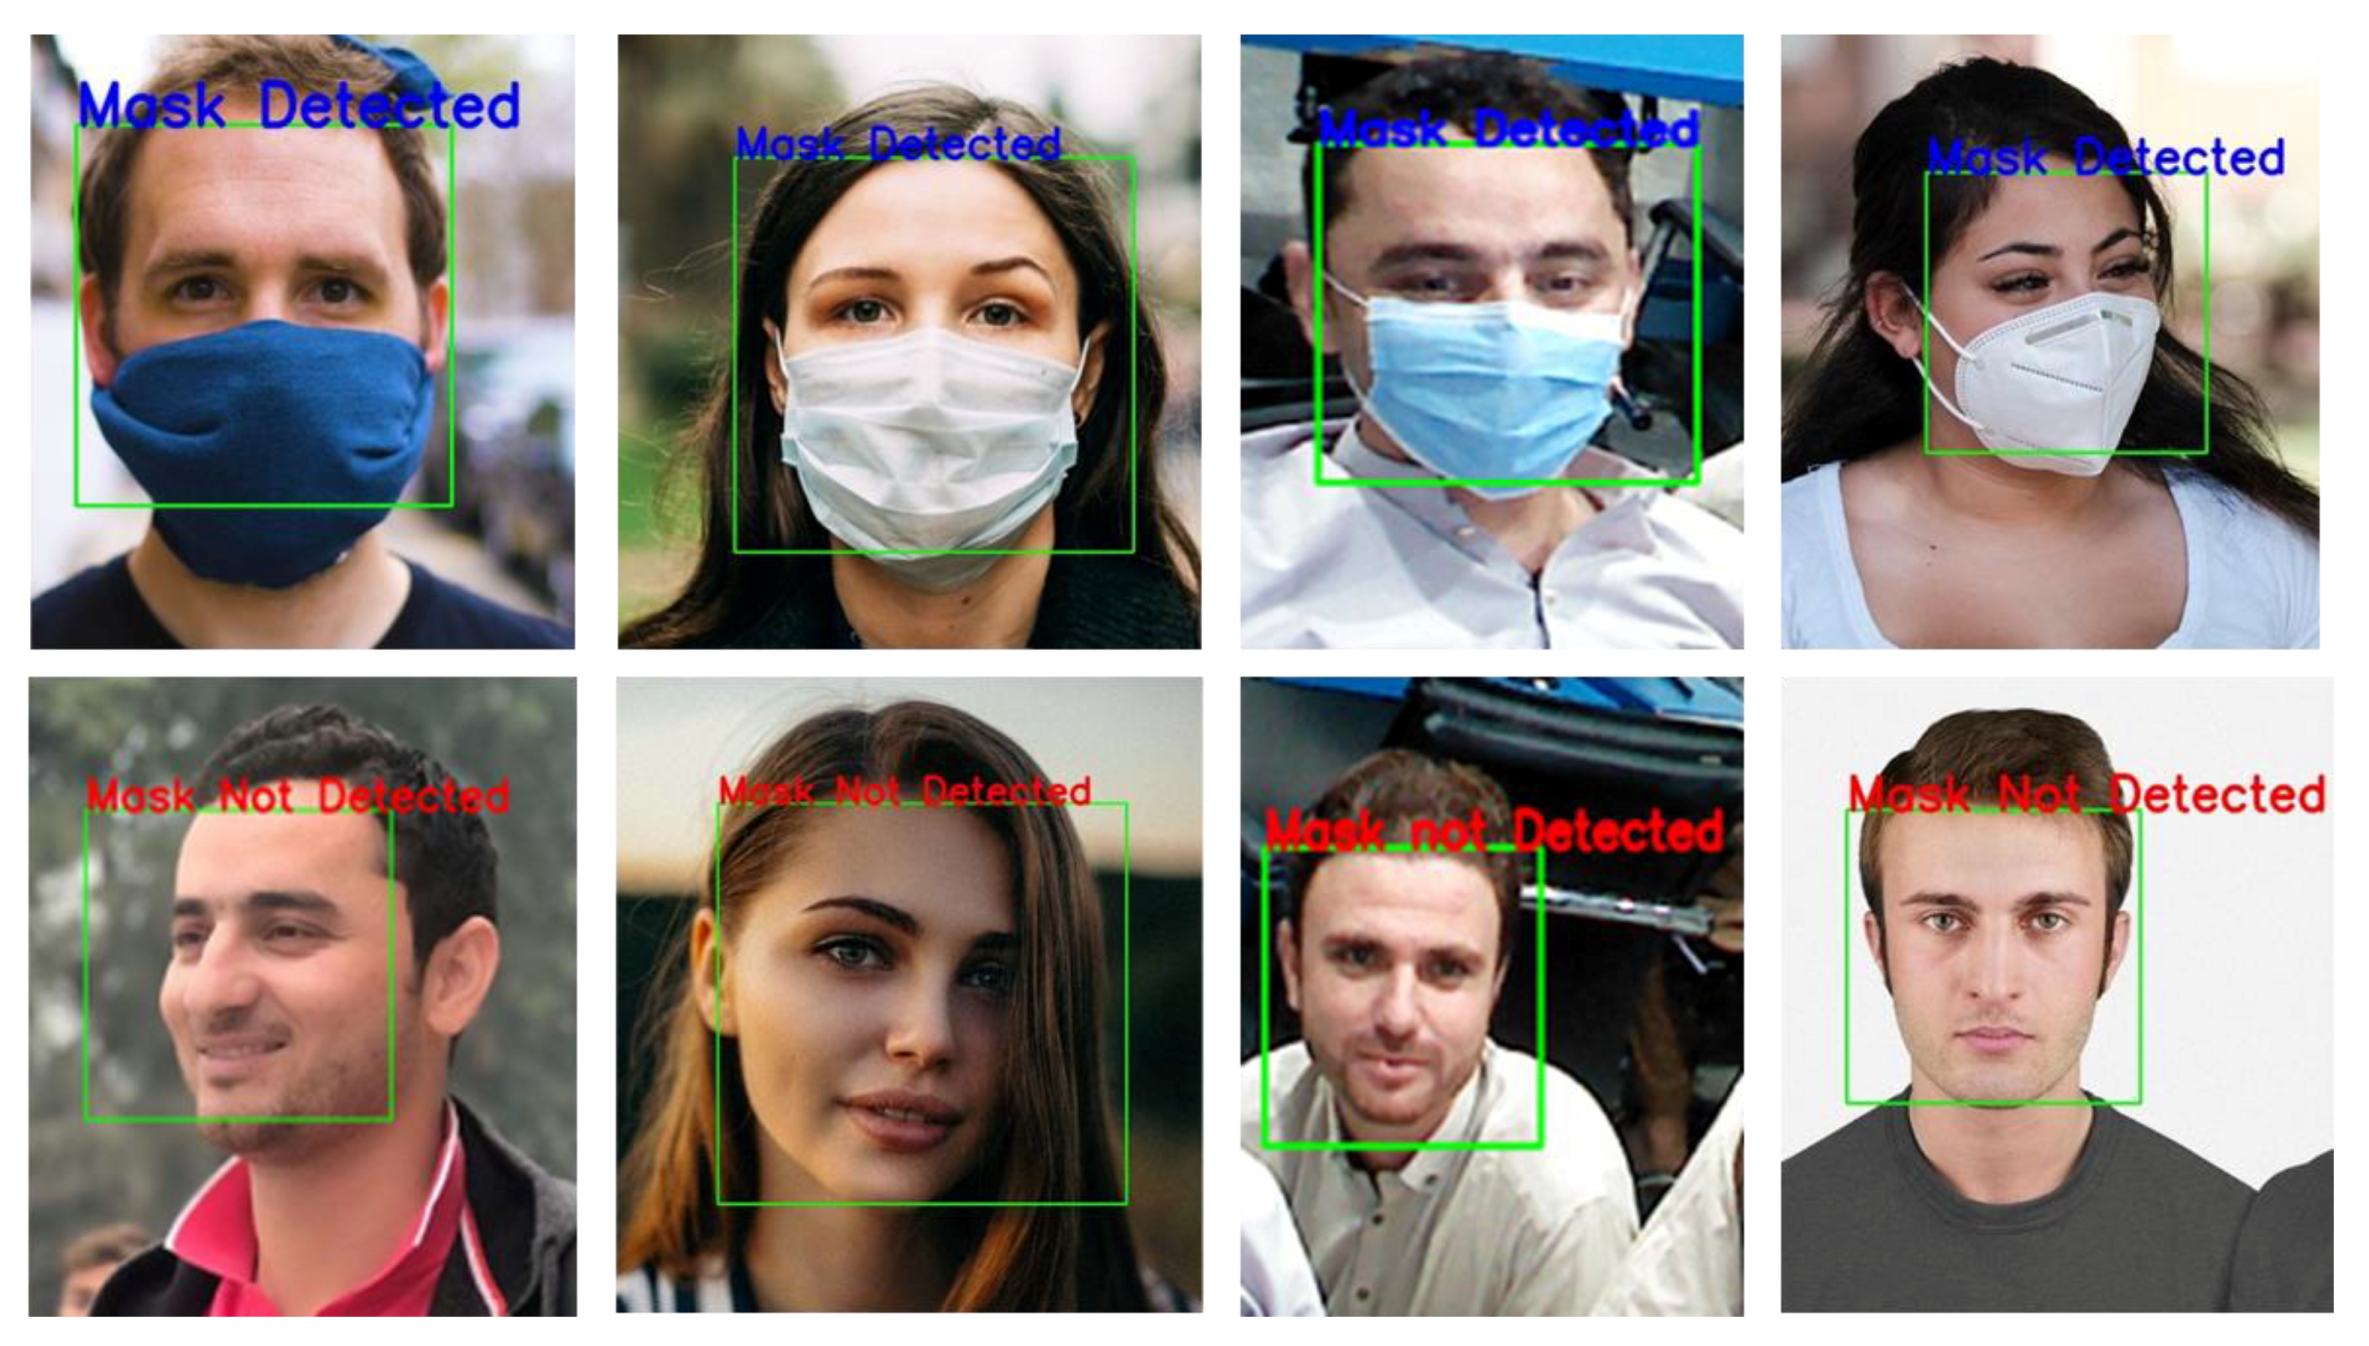



##  **Business Problem**

Due to global health crises such as the COVID-19 pandemic, public health regulations often mandate wearing face masks in public spaces to reduce disease transmission. However, manual monitoring of mask compliance in crowded areas like airports, malls, offices, and schools is inefficient and costly.

Organizations need an **automated solution** to detect whether individuals are wearing masks properly to ensure safety compliance and avoid potential health risks or penalties.

---

##  **Business Objective**

* **Primary Goal**:
  Develop a real-time, automated **Face Mask Detection System** using **CNN** that can:

  * Identify if a person is wearing a **mask**, **not wearing a mask**, or **wearing it improperly**.
  * Trigger alerts or actions in case of non-compliance.
* **Secondary Goals**:

  * Ensure high accuracy and low false positives.
  * Enable integration with CCTV, thermal scanners, or access control systems.
  * Maintain user privacy and data security.

---

##  **Constraints**

| Type                 | Description                                                                  |
| -------------------- | ---------------------------------------------------------------------------- |
| **Hardware**         | Limited edge computing power (e.g., deployment on Raspberry Pi or CCTV DVR). |
| **Latency**          | Real-time processing (preferably < 100ms per frame).                         |
| **Privacy**          | Must not store identifiable facial data unless explicitly authorized.        |
| **Lighting & Angle** | Variable lighting conditions and different face orientations.                |
| **Data Quality**     | Faces may be partially covered, occluded, or blurry.                         |
| **Scalability**      | Should be scalable across hundreds of cameras in a building.                 |

---

##  **Applications**

1. **Public Safety & Health Monitoring**

   * Airports, metro stations, hospitals, malls.
   * Detect and alert authorities of mask violations in real-time.

2. **Corporate Access Control**

   * Allow entry only when a mask is detected (integrated with face recognition).

3. **Education Institutions**

   * Ensure students and staff follow health guidelines.

4. **Retail & Hospitality**

   * Monitor customer compliance in shops, restaurants, and hotels.

5. **Smart Cities & Surveillance**

   * Integrate with smart CCTV systems for public compliance enforcement.

6. **Healthcare Facilities**

   * Monitor staff, patients, and visitors for safety protocol adherence.



In [1]:
import keras
from keras.layers import Input, Conv2D,MaxPool2D, Flatten,Dense
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

In [3]:
model = Sequential()
model.add(Input(shape = (200,200,3)))
model.add(Conv2D(32, (3,3), activation= "relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3), activation= "relu"))
model.add(MaxPool2D())
model.add(Conv2D(32, (3,3), activation= "relu"))
model.add(MaxPool2D())
model.add(Flatten())


model.add(Dense(100, activation = "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16928)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │       1,692,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,722,493 (6.57 MB)

 Trainable params: 1,722,493 (6.57 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer= "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [6]:
imggen = ImageDataGenerator(rescale = 1./255, shear_range=0.6, zoom_range= 0.5, horizontal_flip= True, vertical_flip= True)

In [7]:
path = r"C:\Users\chand\OneDrive\Desktop\ML_FILES\Face_mask_dataset\data"

train_data = imggen.flow_from_directory(directory= path, target_size= (200,200), class_mode= "binary", batch_size= 16)

Found 7553 images belonging to 2 classes.


In [8]:
model.fit(train_data, epochs = 15)

C:\Users\chand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
328/473 ━━━━━━━━━━━━━━━━━━━━ 2:43 1s/step - accuracy: 0.7624 - loss: 0.4962

C:\Users\chand\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


473/473 ━━━━━━━━━━━━━━━━━━━━ 570s 1s/step - accuracy: 0.7805 - loss: 0.4692
Epoch 2/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 320s 677ms/step - accuracy: 0.8764 - loss: 0.3013
Epoch 3/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 316s 668ms/step - accuracy: 0.8867 - loss: 0.2708
Epoch 4/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 360s 761ms/step - accuracy: 0.8999 - loss: 0.2545
Epoch 5/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 286s 605ms/step - accuracy: 0.9096 - loss: 0.2378
Epoch 6/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 241s 509ms/step - accuracy: 0.9088 - loss: 0.2364
Epoch 7/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 237s 500ms/step - accuracy: 0.9240 - loss: 0.2087
Epoch 8/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 251s 530ms/step - accuracy: 0.9175 - loss: 0.2081
Epoch 9/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 243s 513ms/step - accuracy: 0.9352 - loss: 0.1825
Epoch 10/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 233s 492ms/step - accuracy: 0.9339 - loss: 0.1744
Epoch 11/15
473/473 ━━━━━━━━━━━━━━━━━━━━ 217s 459ms/step - accuracy: 0.9382 - loss: 0.1653
Epoch 12/15
473/473 ━━

In [6]:
from keras.models import save_model, load_model

In [13]:
save_model(model , "face_detection.keras")

In [7]:
my_model = load_model(r"C:\Users\chand\Innomatics\Deep Learning\face_detection.keras")

In [4]:
test_img = image.load_img(r"C:\Users\chand\OneDrive\Desktop\ML_FILES\Face_mask_dataset\data\without_mask\without_mask_76.jpg",target_size = (200,200))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)

In [5]:
pred = my_model.predict(test_img)[0][0]
if pred == 0:
    print("Mask is detected")
else:
    print("Mask is not detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
Mask is not detected


In [8]:
confidence = np.max(pred)*100
confidence

100.0

In [8]:
import cv2
from keras.preprocessing import image
import numpy as np

In [9]:
face_detector = cv2.CascadeClassifier(r"C:\Users\chand\Downloads\haarcascade_frontalface_default.xml")

In [10]:
video = cv2.VideoCapture(0)

In [ ]:
while True:
    _,frame = video.read()
    for x,y,w,h in face_detector.detectMultiScale(frame,1.1,2):
        img = frame[y:y+h,x:x+w]
        test_img = cv2.imwrite("face.jpg",img)
        test_img = image.load_img(r"face.jpg",target_size = (200,200))
        test_img = image.img_to_array(test_img)
        test_img = np.expand_dims(test_img,axis = 0)
        pred = pred = my_model.predict(test_img)[0][0]

        if pred == 0:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(frame,'Mask is Detected',(30,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)
        else:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(frame,'Mask is not  Detected',(30,30),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        cv2.imshow("Web cam",frame)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━

In [ ]:
# 